### CIS 9 - Lab 3a

Supervised Learning: Regression and Classification

In [330]:
# Name: 

There are 2 parts to this lab, each part works with a different input file and solves a different type of ML problem. 

In [331]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#### Part 1

You're asked by a bank to create and train an ML model to predict whether a customer will accept an offer for a new credit card from the bank.

One of the primary ways that a bank makes money is through interest from credit card accounts, so the bank would like to know which customers would be more likely to accept a credit card offer, given their banking status.

The input fle is `cc.csv` ([source](https://www.kaggle.com/datasets/thedevastator/unlocking-credit-card-offer-acceptance-trends-in?select=creditcardmarketing-bbm.csv))

1. Read and inspect data

1a. __Read data from `cc.csv` into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__<br>
and __print the first 5 rows__.<br>

In [332]:
cc = pd.read_csv("cc.csv")
print("rows, columns:", cc.shape)
print("first 5 rows:")
cc.head()

rows, columns: (18000, 18)
first 5 rows:


,index,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


1b. The `Offer Accepted` value of 'Yes' is of interest to the bank.<br> 
__Show the number of 'Yes' and 'No' in the `Offer Accepted` column__.

In [333]:
print(cc["Offer Accepted"].value_counts())

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64


2. Data Cleaning

2a. __Show the number of NaNs__ in each column, and __drop any rows with NaN__.<br>
Then __print the number of rows and columns of the DataFrame__ to confirm that there are still a majority of data available.

In [334]:
print("check for NaNs:")
print(cc.isna().sum())
cc = cc.dropna()
print("\ncleaned data rows, columns:", cc.shape)

check for NaNs:
index                    0
Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

cleaned data rows, columns: (17976, 18)


2b. It looks like the `Average Balance` column is the average of the `Q1, Q2, Q3, Q4 Balances`.<br>
Write code to __confirm that the `Average Balance` is the same as the average of the last 4 balance columns__.

_You should not have to use a loop to check. Instead, think of how pandas (numpy) checks for the count of boolean results_.

In [335]:
checkAvg = cc["Average Balance"]*4-cc["Q1 Balance"]-cc["Q2 Balance"]-cc["Q3 Balance"]-cc["Q4 Balance"]
print(np.sum(checkAvg==0), "of the", cc.shape[0], "rows have an Average Balance value that's the same as the average of the last 4 balance columns.")
# checkAvg[checkAvg==0].value_counts()

17976 of the 17976 rows have an Average Balance value that's the same as the average of the last 4 balance columns.


2c. Since the `Average Balance` is representative of the 4 quarter balances, __remove the `Q1, Q2, Q3, Q4 Balances`__.<br>
Also __remove any additional columns that will not be helpful to the ML model__.<br>
Then __print the first 5 rows of the DataFrame__.

In [336]:
cc.dtypes
cc["Q1 Balance"]
cc.drop(columns=["Q1 Balance", "Q2 Balance", "Q3 Balance", "Q4 Balance", "Customer Number", "index"], inplace=True)
cc.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00


2d. Create a Raw NBConvert cell to __explain why you removed the additional columns__ of step 2c.

3. Data Preparation

3a. __Change all the "Yes" strings to the number 1, and all the "No" strings to the number 0__ in the DataFrame.

In [337]:
yn = {"Yes":1, "No":0}
cc.replace(yn,inplace=True)
# cc.dtypes

3b. __Print all the unique values of `Income Level` and of `Credit Rating`__ to confirm that both columns use the 3 values: Low, Medium, High.<br>
Then __change "Low" to 0, "Medium" to 1, and "High" to 2__ in the DataFrame<br>
and __print the first 5 rows__ to check your result.

In [338]:
print(f"Unique Income Level values: {', '.join(set(cc['Income Level']))}")
print(f"Unique Credit Rating values: {', '.join(set(cc['Credit Rating']))}")
lmh = {"Low":0, "Medium":1, "High":2}
cc.replace(lmh,inplace=True)
cc.head()

Unique Income Level values: High, Medium, Low
Unique Credit Rating values: High, Medium, Low


,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,Air Miles,Letter,2,1,0,2,2,1,4,0,1160.75
1,0,Air Miles,Letter,1,1,0,1,2,2,5,1,147.25
2,0,Air Miles,Postcard,2,2,0,1,2,1,2,1,276.50
3,0,Air Miles,Letter,1,2,0,2,1,1,4,0,1219.00
4,0,Air Miles,Letter,1,1,0,1,2,1,6,1,1211.00


3c. __Change values of `Reward` and `Mailer Type` to numbers__<br>
then __print the first 5 rows of the DataFrame__.

In [339]:
print(f"Unique Reward values: {', '.join(set(cc['Reward']))}")
print(f"Unique Mailer Type values: {', '.join(set(cc['Mailer Type']))}")
rewards = {"Points":1, "Air Miles":2, "Cash Back":3}
mailertypes = {"Postcard":1, "Letter":2}
cc.replace(rewards,inplace=True)
cc.replace(mailertypes,inplace=True)
cc.head()

Unique Reward values: Points, Air Miles, Cash Back
Unique Mailer Type values: Postcard, Letter


,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,2,2,2,1,0,2,2,1,4,0,1160.75
1,0,2,2,1,1,0,1,2,2,5,1,147.25
2,0,2,1,2,2,0,1,2,1,2,1,276.50
3,0,2,2,1,2,0,2,1,1,4,0,1219.00
4,0,2,2,1,1,0,1,2,1,6,1,1211.00


3d. __Print the data type of each column__ to confirm that all values in the DataFrame is a number.

In [340]:
print("data types:\n", cc.dtypes)

data types:
 Offer Accepted            int64
Reward                    int64
Mailer Type               int64
Income Level              int64
# Bank Accounts Open      int64
Overdraft Protection      int64
Credit Rating             int64
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home             int64
Average Balance         float64
dtype: object


4. Data Analysis

4a. Create a plot with 12 subplots to __show the distribution of each feature__ (column).<br>
The plot should be 2 rows of 6 subplots each, and each subplot should have a title to specify which distribution is shown.

_You should use a loop to create the 12 subplots, don't copy-paste code 12 times_

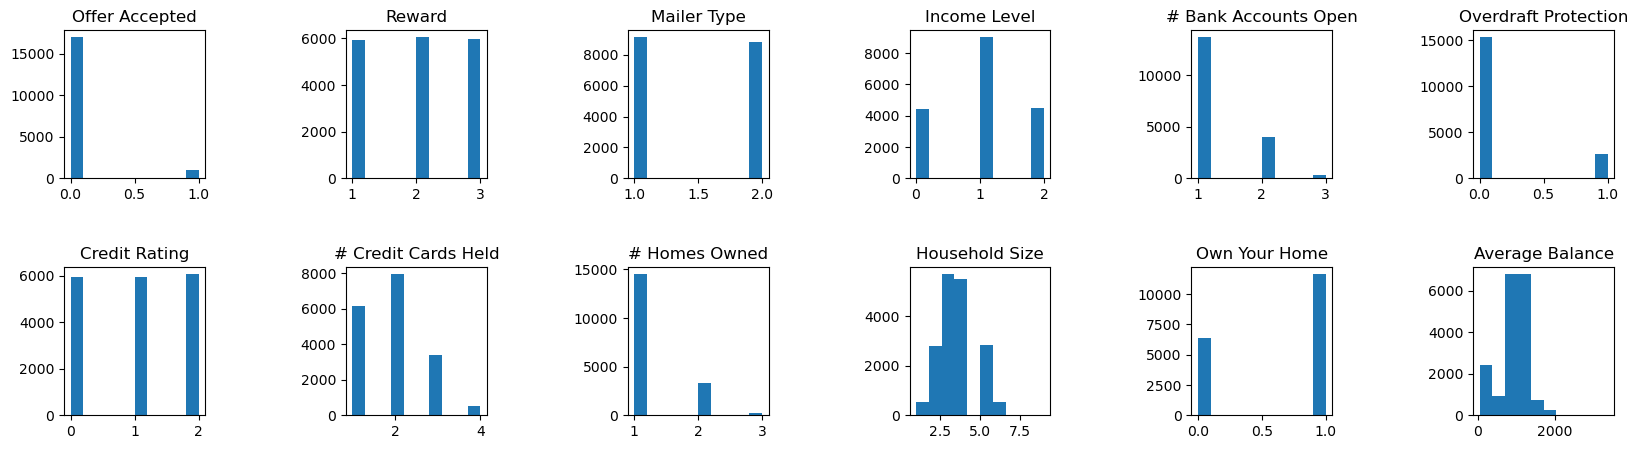

In [341]:
# print(cc.columns)
plt.figure(figsize=(20,5))
i = 1
for col in cc.columns:
    plt.subplot(2, 6, i)
    plt.title(col)
    plt.hist(cc[col])
    plt.plot()
    i += 1
plt.subplots_adjust(hspace=0.6,wspace=1)
# plt.plot()

4c. Create a Raw NBConvert cell to __explain whether there are outliers or anything unusual__ in any of the features.

5. Create training and testing datasets

5a. __Create the X and y datasets__<br>
and __show the number of rows and columns of each dataset__.

In [342]:
X = cc.drop(columns=["Offer Accepted"])
y = cc["Offer Accepted"]
y

0        0
1        0
2        0
3        0
4        0
        ..
17995    0
17996    0
17997    0
17998    0
17999    0
Name: Offer Accepted, Length: 17976, dtype: int64

5b. __Create the training and testing sets__ and __show their dimensions__.

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X train, X test, y train, y test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X train, X test, y train, y test: (12583, 11) (5393, 11) (12583,) (5393,)


6. Train and measure the accuracy of appropriate ML models. <br>

__Create, train, test, and evaluate the accuracy of _all_ the appropriate machine learning models__ that we've discussed in class to predict the customer response.<br>

- It's a good idea to create one or more Code cells for _each_ type of machine learning model.<br>
(Don't have one huge Code cell that has all the models, it makes debugging more difficult)
- For each model, make sure to show all the accuracy measurements that we've discussed in class for the model.<br>
_(Hint: there is more than one measurement)_

In [349]:
# decision tree classifier
# train
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
# test
y_pred = dtc.predict(X_test)
# evaluate (accuracy score, confusion matrix, f1 score)
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy score: 0.8928240311514927
Confusion Matrix:
 [[4780  306]
 [ 272   35]]
F1 score: 0.8954560273591251


7. Based on the accuracy measurements, what would you recommend to the bank?<br>
Create a Raw NBConvert to show your recommendation.

---

#### Part 2

Create and train an ML model to predict the price of a house, given some common features of the house.<br>
The input file is `house.csv` ([source](https://www.kaggle.com/datasets/praveenobulreddy/usa-housing-dataset)).

1. Read and inspect data

1a. __Read data from `house.csv` into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__<br>
and __print the first 5 rows__.

1b. __Remove any unnecessary columns__.

1c. __Check for NaNs and drop rows with NaNs__.

2. Data Cleaning

__Shorten the column headers to the last word__ only.<br>
For example, "Avg. Area Income" becomes "Income"<br>
Then __show the first 5 rows of the DataFrame__.

3. Data Analysis

3a. __Plot the distribution of the Price__ column<br>
The plot should have a title.

3b. Create a Raw NBConvert cell to __explain whether the data is balanced__, based on the plot.

3c. Create a plot with 5 subplots to __show any correlation between each feature and the price__.<br>
The plot should be in 2 rows of 2-3 subplots each, and each subplot should have a title to specify which distribution is shown.

_You should use a loop to create the subplots._

3d. Is there any correlation between the features and the price?<br>
Create a Raw NBConvert to __explain any correlation__.

4.Create training and testing datasets

4a. __Create the X and y datasets__<br>
and __show the number of rows and columns of each dataset__.

4b. __Create the training and testing sets__ and __show their dimensions__.

5. Train and measure accuracy of appropriate ML models. <br>

__Create, train, test, and evaluate the accuracy of _all_ the appropriate machine learning models__ that we've discussed in class to predict the customer response.<br>

- It's a good idea to create one or more Code cells for _each_ type of machine learning model.<br>
(Don't have one huge Code cell that has all the models, it makes debugging more difficult)
- For each model, make sure to show all the accuracy measurements that we've discussed in class for the model.<br>
_(Hint: there is more than one measurement)_

6. For the models that you used, do they have the same list of important features?
Create a Raw NBConvert cell to __compare the lists of important features__.